# Project - Email Spam Filtering
- Spam filters are designed to identify emails that attackers or marketers use to send unwanted or dangerous content. They use specific filtering methods to identify the content of emails or their senders and then flag the email as spam.

- Purpose for model is to check email is spam or ham

# 1. Load Python Libraries

In [ ]:
# Data Handling Libraries
import pandas as pd
import numpy as np

#Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Email SPAM')

In [ ]:
os.listdir(
)

['email_data.csv', 'Email Spam Filetering.ipynb']

In [ ]:
df=pd.read_csv('email_data.csv')

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


# 3. EDA

In [ ]:
# foucus of label column for check email is spam or not
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

- there is biased in the data as per chart and not in proper average
- if we take both `ham and spam` equal datapoints, we can lost/ ignore large amount of `ham` data for analysis

# 4. Data Preparation - Splitting the data for algorithm t_train and t_test

In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

- Here `text` columns is my input and label `label` columns is my output

In [ ]:
x=df[['text']]
y=df['label']

- Splitting the data into test train split using `sklearn` library

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
print('x_train size',x_train.shape)
print('y_train size',y_train.shape)

x_train size (3878, 1)
y_train size (3878,)


- importing text preprocessing libraries

In [ ]:
import re # regex library
import nltk #natural language toolkit

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

#Package PorterStemer is imported from module stem
#Packages for tokenization of sentence as well as words are imported
#A sentence is written which is to be tokenized in the next step.
#Word tokenization stemming lemmatization is implemented in this step.
#An object for PorterStemmer is created here

# initialise the inbuilt Stemmer
stemmer = PorterStemmer()
# We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Downloading wordnet before applying Lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

- Function for data cleaning / preparation BOW (bag of words using stem and lamit)
-  steps are involve in data cleaning for NLP:-
  1. Removing special character
  2. lowercase all words
  3. remove stopwords from the data
  4. managing stemming/ lammitization

In [ ]:


def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

-  !pip install tqdm
    - tqdm is a Python library for adding progress bar

In [ ]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [ ]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

# calling function for stamming purpose
temp_df = x_train['text'].progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()

100%|██████████| 3878/3878 [01:27<00:00, 44.18it/s]


,0,1
2666,subject half day vac dentist appt,6
3687,subject august estim avail victor lamadrid ect...,168
4749,subject bayer march volum want make sure volum...,28
2954,subject meter daren flow referenc meter withou...,29
4316,subject meter august alloc except lauri fluctu...,582


In [ ]:
# renaming the column name 0 for clean text and 1 for text length
temp_df.columns = ['clean_text_stem', 'text_length_stem']
temp_df.head()

,clean_text_stem,text_length_stem
2666,subject half day vac dentist appt,6
3687,subject august estim avail victor lamadrid ect...,168
4749,subject bayer march volum want make sure volum...,28
2954,subject meter daren flow referenc meter withou...,29
4316,subject meter august alloc except lauri fluctu...,582


In [ ]:
# concetinatane temp df into main df of x_train

x_train = pd.concat([x_train, temp_df], axis=1)
x_train.head()

,text,clean_text_stem,text_length_stem
2666,Subject: half day of vac on 2 / 28\n12 . 20 de...,subject half day vac dentist appt,6
3687,Subject: re : august 2000 estimated availabili...,subject august estim avail victor lamadrid ect...,168
4749,Subject: bayer - march 2001 volumes\njust want...,subject bayer march volum want make sure volum...,28
2954,"Subject: meter 6315\ndaren ,\ni have some flow...",subject meter daren flow referenc meter withou...,29
4316,Subject: re : meter # : 1266 ; august 2000 / a...,subject meter august alloc except lauri fluctu...,582


- text = original data
- clean_text_stem = cleaned text, removed spacial char, and in lower case
- text_length_stem = length of data

In [ ]:
#calling function for lammitization purpose

temp_df = x_train['text'].progress_apply(lambda x: preprocess(x, 'lemma'))
temp_df.head()

100%|██████████| 3878/3878 [01:28<00:00, 44.05it/s]


,0,1
2666,subject half day vac dentist appt,6
3687,subject august estimated availability victor l...,168
4749,subject bayer march volume want make sure volu...,28
2954,subject meter daren flow referenced meter with...,29
4316,subject meter august allocation exception laur...,582


In [ ]:
#renaming after lamitization

temp_df.columns = ['clean_text_lemma', 'text_length_lemma']
temp_df.head()

,clean_text_lemma,text_length_lemma
2666,subject half day vac dentist appt,6
3687,subject august estimated availability victor l...,168
4749,subject bayer march volume want make sure volu...,28
2954,subject meter daren flow referenced meter with...,29
4316,subject meter august allocation exception laur...,582


In [ ]:
x_train = pd.concat([x_train, temp_df], axis=1)

x_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
2666,Subject: half day of vac on 2 / 28\n12 . 20 de...,subject half day vac dentist appt,6,subject half day vac dentist appt,6
3687,Subject: re : august 2000 estimated availabili...,subject august estim avail victor lamadrid ect...,168,subject august estimated availability victor l...,168
4749,Subject: bayer - march 2001 volumes\njust want...,subject bayer march volum want make sure volum...,28,subject bayer march volume want make sure volu...,28
2954,"Subject: meter 6315\ndaren ,\ni have some flow...",subject meter daren flow referenc meter withou...,29,subject meter daren flow referenced meter with...,29
4316,Subject: re : meter # : 1266 ; august 2000 / a...,subject meter august alloc except lauri fluctu...,582,subject meter august allocation exception laur...,582


# 5. Creating world cloud using dataframe

In [ ]:
# library for world cloud
from wordcloud import WordCloud

In [ ]:
#filtering spam email from x_train data frame
spam_df = x_train.loc[y_train=='spam', :]
spam_df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
3489,Subject: software\nmicrosoft windows xp profes...,subject softwar microsoft window xp profession...,118,subject software microsoft window xp professio...,118
2545,Subject: fw : nice neighbour girl cumming movi...,subject fw nice neighbour girl cum movi boo mu...,10,subject fw nice neighbour girl cumming movie b...,10
1596,Subject: circle of friends = )\nhi my new frie...,subject circl friend hi new friend want see ph...,23,subject circle friend hi new friend want see p...,23
345,Subject: send out five motor\natt : client id ...,subject send five motor att client id refer ca...,38,subject send five motor att client id referrin...,38
3088,Subject: simple and quick\npone line service\n...,subject simpl quick pone line servic cat ego t...,64,subject simple quick pone line service cat ego...,64


In [ ]:
# selecting 100 words lemmatization
words = ' '.join(spam_df['clean_text_lemma'])
print(words[:100])

subject software microsoft window xp professional retail price low price save adobe photoshop retail


In [ ]:
#filtering out subject because in subject tab of email it is common
spam_df = x_train.loc[y_train=='spam', :]
words = ' '.join(spam_df['clean_text_lemma'])

cleaned_word = " ".join([word for word in words.split()
                        if 'subject' not in word])

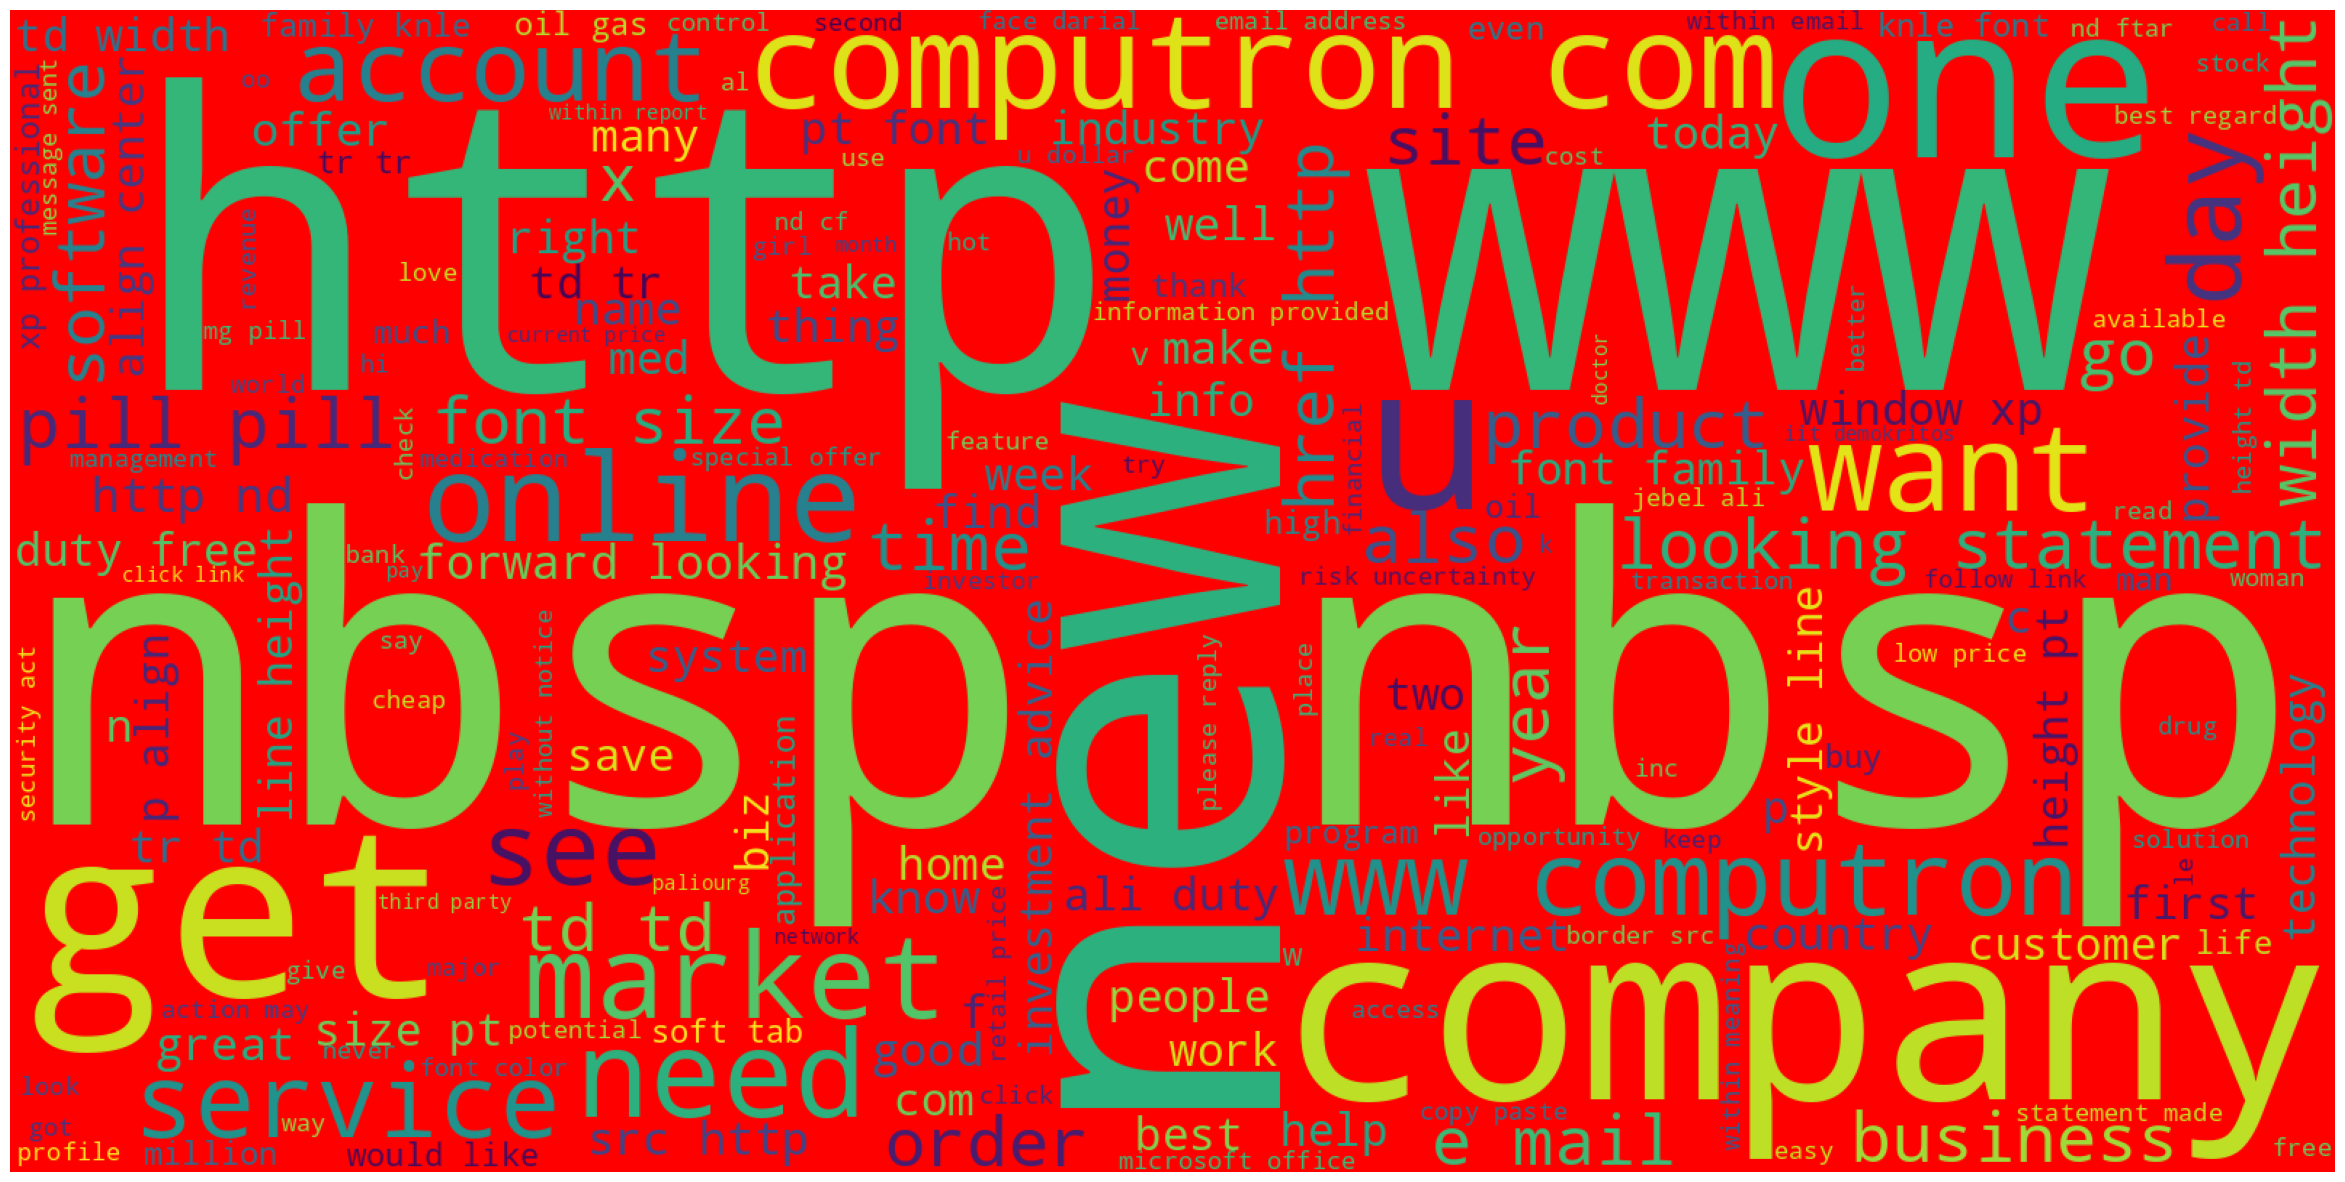

In [ ]:
# variable for spam world cloud
spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='red',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)
plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# hamm keywords for emails
ham_df = x_train.loc[y_train=='ham', :]
words = ' '.join(ham_df['clean_text_lemma'])

cleaned_word = " ".join([word for word in words.split()
                        if 'subject' not in word])

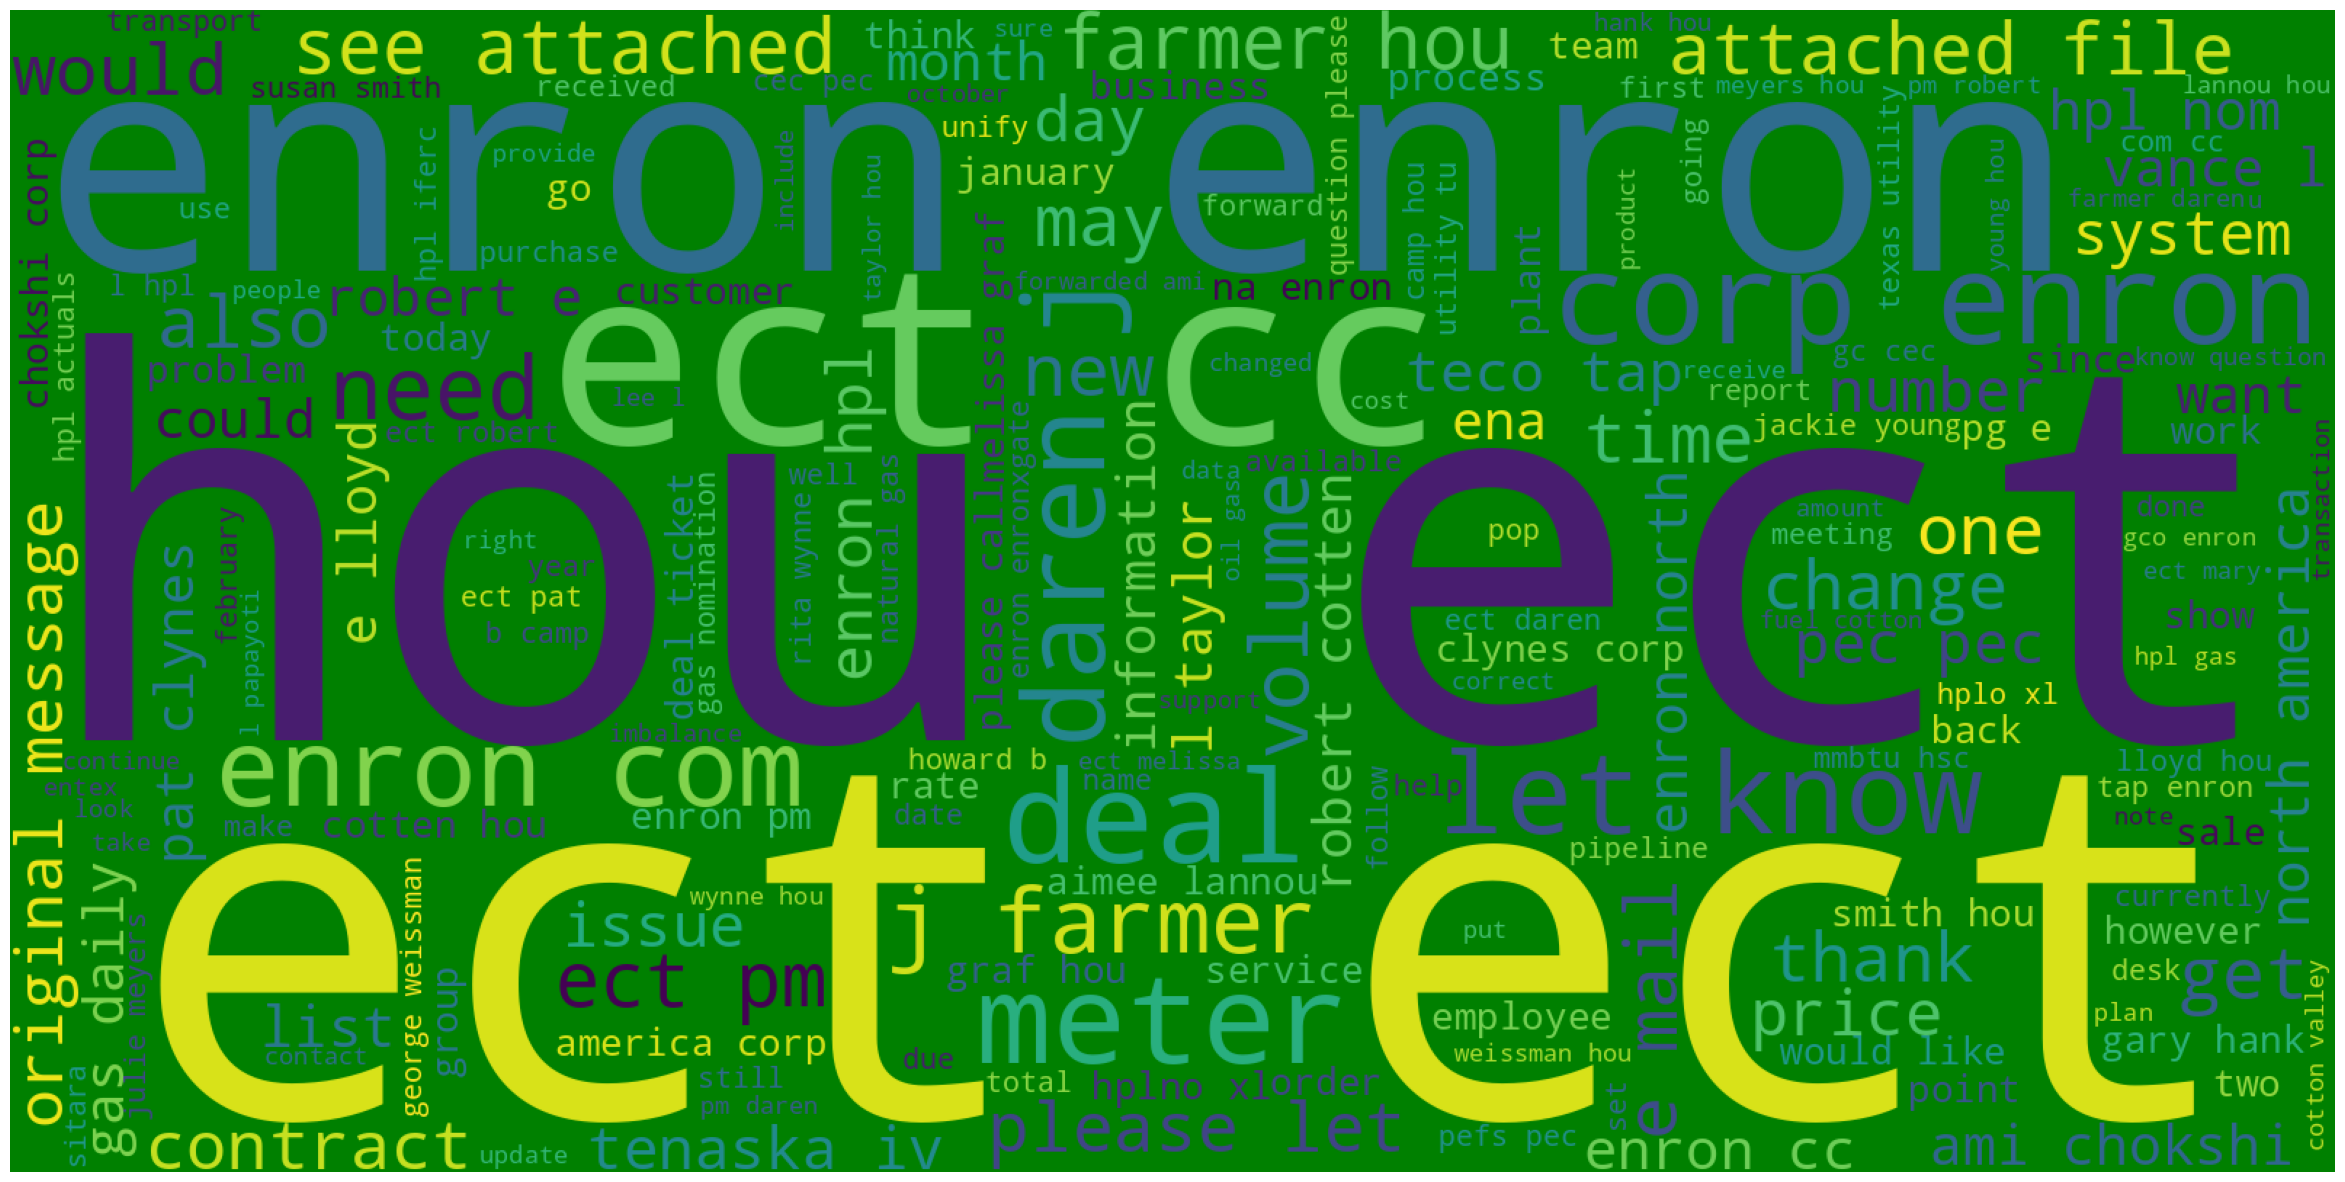

In [ ]:
ham_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='green',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)
plt.figure(1,figsize=(30,20))
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.show()

# 6. Converting vocab into numerical represenatation


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer()
x_train_bow = vocab.fit_transform(x_train['clean_text_lemma'])

In [ ]:
print("Total unique words:", len(vocab.vocabulary_))
print("Type of train features:", type(x_train_bow))
print("Shape of input data:", x_train_bow.shape)

Total unique words: 35252
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (3878, 35252)


In [ ]:
#printing in array
print(x_train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sys import getsizeof

print(type(x_train_bow))
print(getsizeof(x_train_bow), "Bytes")
print(type(x_train_bow.toarray()))
print(getsizeof(x_train_bow.toarray()), "Bytes")

<class 'scipy.sparse._csr.csr_matrix'>
48 Bytes
<class 'numpy.ndarray'>
1093658176 Bytes


# preprocessing the test data

In [ ]:
temp_df = x_test['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()
#test data pass to function for process


100%|██████████| 1293/1293 [00:24<00:00, 53.59it/s]


,0,1
1789,subject ship channel hub co please review comm...,26
2277,subject feb intercompany accrual variance list...,128
2618,subject meter daren meter recorded flow jan ye...,34
3144,subject via ggra lousy mizar anti curb hemisph...,35
3756,subject potential list feb daren aware potenti...,33


In [ ]:
#rename test data
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']
temp_df.head()

,clean_text_lemma,text_length_lemma
1789,subject ship channel hub co please review comm...,26
2277,subject feb intercompany accrual variance list...,128
2618,subject meter daren meter recorded flow jan ye...,34
3144,subject via ggra lousy mizar anti curb hemisph...,35
3756,subject potential list feb daren aware potenti...,33


In [ ]:
#test data processed coneatinate to temp data for comparing output
x_test = pd.concat([x_test, temp_df], axis=1)
x_test.head()

,text,clean_text_lemma,text_length_lemma
1789,Subject: ship channel hub co\nplease review / ...,subject ship channel hub co please review comm...,26
2277,Subject: feb 2000 intercompany accrual varianc...,subject feb intercompany accrual variance list...,128
2618,"Subject: meter 981318\ndaren ,\nthe above mete...",subject meter daren meter recorded flow jan ye...,34
3144,Subject: via - ggra is lousy mizar\nanti\ncurb...,subject via ggra lousy mizar anti curb hemisph...,35
3756,Subject: potential list - feb . 2001\ndaren :\...,subject potential list feb daren aware potenti...,33


In [ ]:
x_test_bow = vocab.transform(x_test['clean_text_lemma'])

# 7. Machine Learning Algorithm

# a. Logistic regression

In [ ]:
# import library for logistic regression under supervised learning in classification
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_bow, y_train)

LogisticRegression()

In [ ]:
y_test_pred = classifier.predict(x_test_bow)

In [ ]:
#evaluation of logistic regression
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.9737045630317092
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       923
        spam       0.93      0.98      0.96       370

    accuracy                           0.97      1293
   macro avg       0.96      0.98      0.97      1293
weighted avg       0.97      0.97      0.97      1293



# b. Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_bow, y_train)

y_test_pred = classifier.predict(x_test_bow)

from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.9551430781129157
              precision    recall  f1-score   support

         ham       0.97      0.96      0.97       923
        spam       0.91      0.94      0.92       370

    accuracy                           0.96      1293
   macro avg       0.94      0.95      0.95      1293
weighted avg       0.96      0.96      0.96      1293



# c. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_bow, y_train)

y_test_pred = classifier.predict(x_test_bow)

from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.9783449342614076
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       923
        spam       0.95      0.98      0.96       370

    accuracy                           0.98      1293
   macro avg       0.97      0.98      0.97      1293
weighted avg       0.98      0.98      0.98      1293

